In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_sas('traffic_collisions_asr_t_tbl_001.sas7bdat', format = 'sas7bdat', encoding = 'iso-8859-1')

In [17]:
df.head(5)

,X,Y,OBJECTID,EventUniqueId,OccurrenceDate,Month,Day_of_Week,Year,Hour,Division,Atom,Neighbourhood,Fatalities,Injury_Collisions,FTR_Collisions,PD_Collisions,Longitude,Latitude,ObjectId2
0,-8.834615e+06,5.412065e+06,126.0,GO-20141274487,2014/01/03 05:00:00+00,January,Friday,2014.0,14.0,D51,73,Moss Park (73),0.0,NO,NO,YES,-79.362699,43.654078,1.0
1,-8.832662e+06,5.414068e+06,127.0,GO-20141274697,2014/01/03 05:00:00+00,January,Friday,2014.0,15.0,D54/D55,68,North Riverdale (68),0.0,YES,NO,NO,-79.345155,43.667095,2.0
2,-8.847529e+06,5.419398e+06,128.0,GO-20141274712,2014/01/03 05:00:00+00,January,Friday,2014.0,15.0,D12,30,Brookhaven-Amesbury (30),0.0,NO,NO,YES,-79.478704,43.701719,3.0
3,-8.851156e+06,5.406576e+06,129.0,GO-20141274922,2014/01/03 05:00:00+00,January,Friday,2014.0,15.0,D22,17,Mimico (includes Humber Bay Shores) (17),0.0,NO,NO,YES,-79.511291,43.618394,4.0
4,-8.831959e+06,5.422290e+06,130.0,GO-20141275114,2014/01/03 05:00:00+00,January,Friday,2014.0,16.0,D33,42,Banbury-Don Mills (42),0.0,YES,NO,NO,-79.338834,43.720501,5.0


In [9]:
df[df['EventUniqueId'] == 'GO-2019115545']

,X,Y,OBJECTID,EventUniqueId,OccurrenceDate,Month,Day_of_Week,Year,Hour,Division,Atom,Neighbourhood,Fatalities,Injury_Collisions,FTR_Collisions,PD_Collisions,Longitude,Latitude,ObjectId2
312702,-8.834386e+06,5.419611e+06,355403.0,GO-2019115545,2019/01/19 05:00:00+00,January,Saturday,2019.0,5.0,D53,56,Leaside-Bennington (56),0.0,YES,NO,NO,-79.360638,43.703105,312703.0
312703,-8.834386e+06,5.419611e+06,355404.0,GO-2019115545,2019/01/19 05:00:00+00,January,Saturday,2019.0,5.0,D53,56,Leaside-Bennington (56),1.0,NO,NO,NO,-79.360638,43.703105,312704.0


<AxesSubplot:xlabel='Year'>

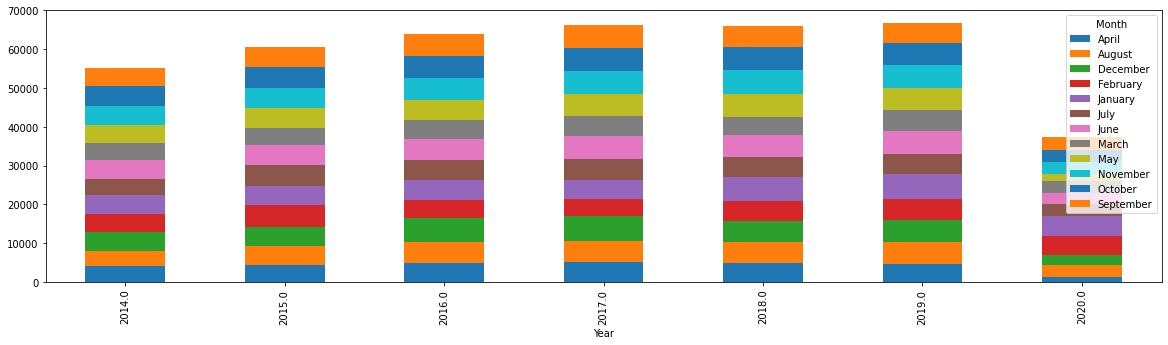

In [30]:
df.sort_values(['Year', 'Month'], ascending = True).groupby(['Year', 'Month'])['EventUniqueId'].nunique().unstack().plot(kind = 'bar', stacked = True, figsize = (20, 5))

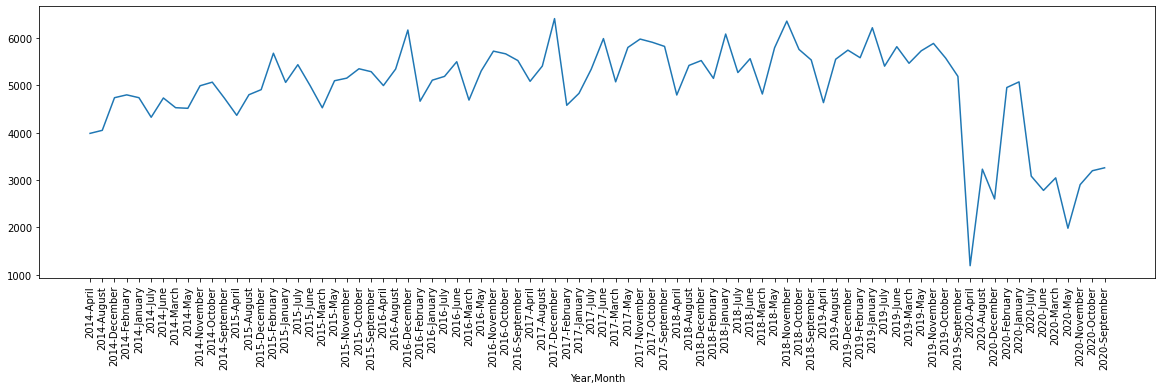

In [11]:
an = df.sort_values(['Year', 'Month'], ascending = True).groupby(['Year', 'Month'])['EventUniqueId'].nunique()
p1 = an.plot(kind = 'line', figsize = (20, 5))
p1.set_xticks(range(len(an)));
p1.set_xticklabels(["%02d-%s" % item for item in an.index.tolist()], rotation=90);

<AxesSubplot:>

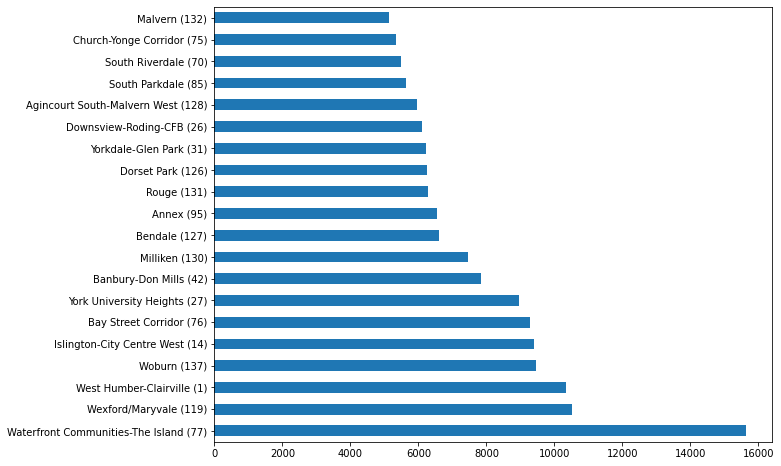

In [42]:
df['Neighbourhood'].value_counts().sort_values(ascending = False)[:20].plot(kind = 'barh', figsize = (10, 8))

In [43]:
df.head(2)

,X,Y,OBJECTID,EventUniqueId,OccurrenceDate,Month,Day_of_Week,Year,Hour,Division,Atom,Neighbourhood,Fatalities,Injury_Collisions,FTR_Collisions,PD_Collisions,Longitude,Latitude,ObjectId2
0,-8.834615e+06,5.412065e+06,126.0,GO-20141274487,2014/01/03 05:00:00+00,January,Friday,2014.0,14.0,D51,73,Moss Park (73),0.0,NO,NO,YES,-79.362699,43.654078,1.0
1,-8.832662e+06,5.414068e+06,127.0,GO-20141274697,2014/01/03 05:00:00+00,January,Friday,2014.0,15.0,D54/D55,68,North Riverdale (68),0.0,YES,NO,NO,-79.345155,43.667095,2.0


In [45]:
new_df = pd.DataFrame()
new_df['Injury Collisions'] = [val == 'YES' for val in df['Injury_Collisions']]
new_df['Fail to remain Collisions'] = [val == 'YES' for val in df['FTR_Collisions']]
new_df['Property Collisions'] = [val == 'YES' for val in df['PD_Collisions']]
new_df['Fatal Collisions'] = df['Fatalities']

<AxesSubplot:>

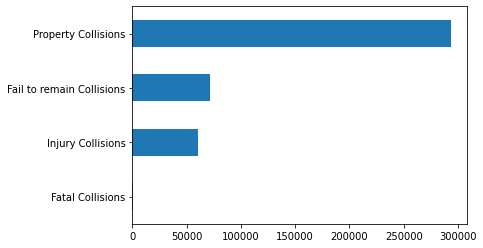

In [54]:
# Only 411 Fatal Collisions

new_df.sum().sort_values(ascending = True).plot(kind = 'barh')

In [50]:
# some events have multiple fatalities

df[df['Fatalities'] > 1]

,X,Y,OBJECTID,EventUniqueId,OccurrenceDate,Month,Day_of_Week,Year,Hour,Division,Atom,Neighbourhood,Fatalities,Injury_Collisions,FTR_Collisions,PD_Collisions,Longitude,Latitude,ObjectId2
125804,-8.851367e+06,5.425200e+06,142334.0,GO-2016607400,2016/04/10 04:00:00+00,April,Sunday,2016.0,3.0,D31,25,Glenfield-Jane Heights (25),3.0,NO,NO,NO,-79.513180,43.739390,125805.0
183463,-8.827775e+06,5.428925e+06,205385.0,GO-20171757438,2017/09/27 04:00:00+00,September,Wednesday,2017.0,21.0,D41,119,Wexford/Maryvale (119),2.0,NO,NO,NO,-79.301256,43.763562,183464.0
317681,-8.820272e+06,5.431729e+06,361747.0,go-20192465950,2019/12/22 05:00:00+00,December,Sunday,2019.0,18.0,D43,137,Woburn (137),2.0,NO,NO,NO,-79.233849,43.781745,317682.0


<AxesSubplot:xlabel='Hour'>

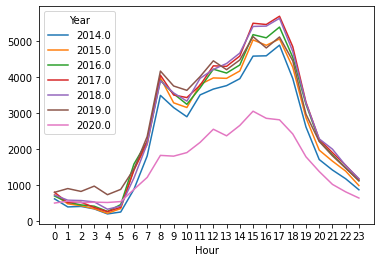

In [4]:
df.groupby(['Hour', 'Year'])['EventUniqueId'].nunique().unstack().plot(kind = 'line', xticks = range(24))